Import Modules and Load Data Use the custom utility to read the data.

In [9]:
import os
os.chdir('../scripts/')
import utils as util
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = '../data/raw_analyst_ratings.csv'
df = util.read_csv_file(data_path).get("data")

# View the first few rows
df.head()


Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Data Overview Check the structure and key statistics:

In [2]:
print("Data Summary:")
print(df.describe())
print(df.info())
print("Missing Values:\n", df.isnull().sum())


Data Summary:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
Missing Values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


Descriptive Statistics Analyze textual data such as headline lengths

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


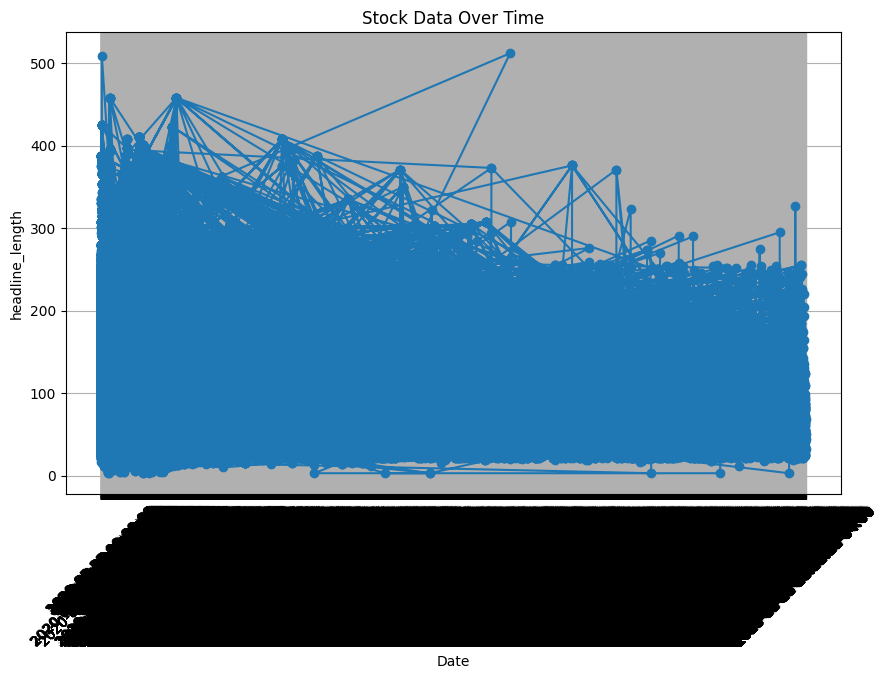

In [3]:
df['headline_length'] = df['headline'].apply(len)
print("Headline Length Statistics:\n", df['headline_length'].describe())

# Plot headline length distribution
import plot as plt_util
plt_util.plot_stock_data(df, 'date', 'headline_length')


Publisher Analysis Find the most active publishers

Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


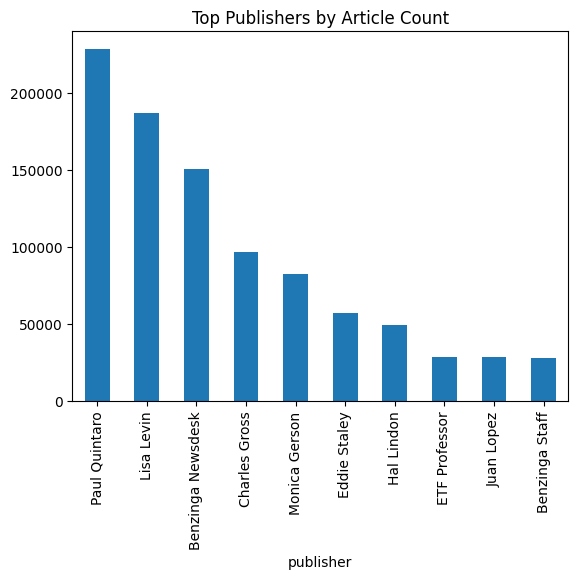

In [10]:
top_publishers = df['publisher'].value_counts().head(10)
print("Top 10 Publishers:\n", top_publishers)

top_publishers.plot(kind='bar', title='Top Publishers by Article Count')
plt.show()


Time Series Analysis Analyze publication trends over time.

In [11]:
df['date'] = pd.to_datetime(df['date'])
daily_articles = df.groupby(df['date'].dt.date).size()

plt_util.plot_stock_data(daily_articles.reset_index(), 'date', 0)


ValueError: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Sentiment Analysis Use TextBlob to analyze sentiment.

In [14]:
!pip install textblob


python(59724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached textblob-0.18.0.post0-py3-none-any.whl.metadata (4.5 kB)
Using cached textblob-0.18.0.post0-py3-none-any.whl (626 kB)


Sentiment Analysis:
 count    1.407328e+06
mean     4.905657e-02
std      1.830652e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64


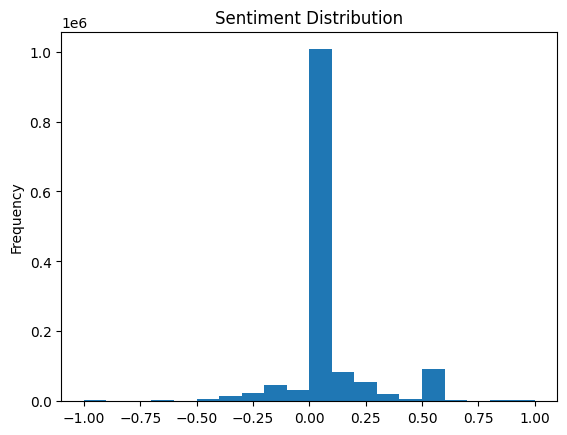

In [15]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['headline'].apply(get_sentiment)
print("Sentiment Analysis:\n", df['sentiment'].describe())

# Plot sentiment distribution
df['sentiment'].plot(kind='hist', bins=20, title='Sentiment Distribution')
plt.show()


Save Processed Data Save 

In [16]:
df.to_csv('../data/processed_data.csv', index=False)
print("Processed data saved!")


Processed data saved!
